In [30]:
import pickle
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
# NLTK imports
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Sastrawi imports (for Indonesian language)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# TextBlob imports
from textblob import TextBlob, Word

# scikit-learn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

# WordCloud import
from wordcloud import WordCloud

from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.cluster import KMeans


## NLTK

In [3]:
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [4]:
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [5]:
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<Axes: xlabel='Key'>

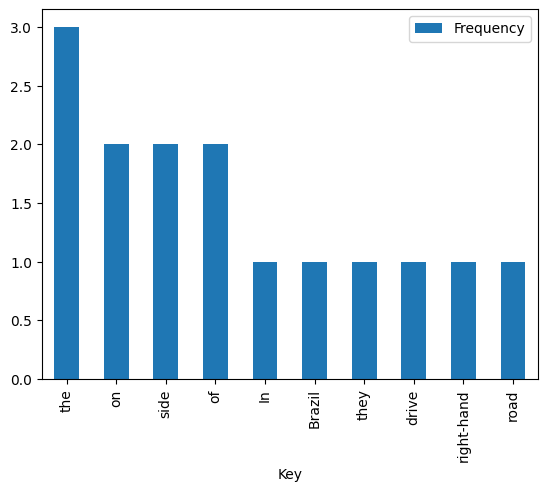

In [6]:
df_freq_tokens = pd.DataFrame(fdist1,columns=['Key','Frequency'])
df_freq_tokens.set_index('Key',inplace=True)
df_freq_tokens.plot(kind='bar')

In [7]:
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [8]:
S = 'presumably I would like to MultiPly my provision, saying tHat without crYing'
print('Sentence: ',S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name,':', ' '.join(st.stem(s) for s in S.split()))

Sentence:  presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster : presum i would lik to multiply my provision, say that without cry
Porter : presum i would like to multipli my provision, say that without cri
SnowBall : presum i would like to multipli my provision, say that without cri


In [9]:
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [10]:
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'
tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


## TextBlob

In [11]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences
print(TextBlob(T).words)
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [12]:
print("Stem:", Word('running').stem())
print("Lemmatize:", Word('went').lemmatize('v'))

Stem: run
Lemmatize: go


In [13]:
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

## Sastrawi

In [14]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [15]:
stemmer = StemmerFactory().create_stemmer()
I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi sua


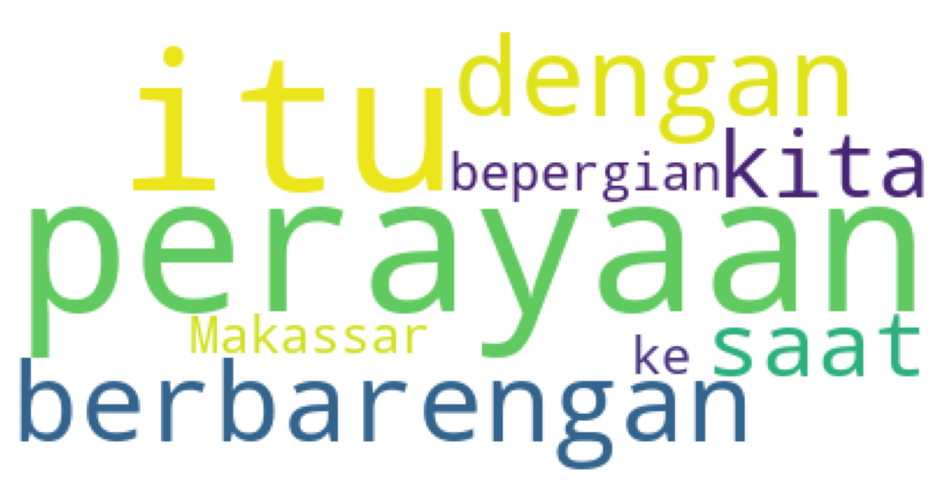

In [16]:
wordcloud = WordCloud(background_color="white").generate(I)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Clustering

In [26]:
stop_words = set(stopwords.words('english'))
src_name = r"C:\Users\Adi Karunia\Downloads\4 ME\UNAIR\MATKUL\SMT 5\DATMIN\PRAKTIKUM\TM 4\20newsgroup.pckl"
src_path = os.path.join("data", src_name) 
try:
    with open(src_path, 'rb') as fin:
        data = pickle.load(fin)
    docs = [doc for doc in data.data]
    label = data.target
except FileNotFoundError:
    print(f"Peringatan: File '{src_path}' tidak ditemukan. Menggunakan data contoh.")
    '''docs = [
        "The quick brown fox jumps over the lazy dog.",
        "A fast-moving brown fox leaps over a sleepy dog.",
        "The new movie is awesome, a great film.",
        "I love this new film, it is fantastic.",
        "What is the price of this computer hardware?",
        "Computer software and hardware prices are dropping."
    ]'''

def preprocess(doc):
    """
    Fungsi untuk membersihkan teks:
    1. Tokenisasi kata
    2. Hapus stopwords
    3. Ubah ke huruf kecil (case folding)
    4. Hapus karakter non-alfanumerik
    5. Hapus spasi berlebih
    """
    words = word_tokenize(doc)
    words = [t for t in words if t.lower() not in stop_words]

    sents_tok = []
    for s in words:
        s = s.strip().lower() 
        s = s.replace("\n", " ") 
        s = re.sub("[^a-zA-Z0-9]", " ", s) 
        s = re.sub("\s+", " ", s) 
        if s.strip(): 
            sents_tok.append(s.strip())
            
    return " ".join(sents_tok)
docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)
k = 3
seed = 99 
kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10) # n_init=10 ditambahkan untuk menghindari warning
kmeans.fit(X)
C = kmeans.predict(X)
C_km = C
print("Hasil Cluster (10 dokumen pertama):")
print(C_km[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster (10 dokumen pertama):
[2 0 2 0 0 0 0 2 0 0]


In [ ]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]

array([2, 1, 2, 1, 1, 2, 0, 0, 1, 1])

In [ ]:
dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
C = [C_km, C_kmpp, C_db]
for res in C:
    print(siluet(X, res), end=', ')

0.01749567738259666, -0.0050313449258956875, -0.23765091937418498, 

In [ ]:
for res in C:
    print(purity(label, res), end=', ')

0.21449949765714296, 0.2702976630484694, 0.0015549989772357536, 

In [ ]:
for res in C:
    print(NMI(label, res), end=', ')

0.2738040819562823, 0.2770235334978559, 0.002704356633566744, 

## Tugas Praktikum

In [ ]:
text = "Para mahasiswa sedang mempelajari kalkulus di kampus dengan sangat rajinnya pada pagi hari."
stop_words = set(stopwords.words("indonesian"))
tokens_nltk = word_tokenize(text.lower())
filtered_nltk = [t for t in tokens_nltk if t not in stop_words and t.isalpha()]
blob = TextBlob(text.lower())
tokens_tb = blob.words  
tokens_sastrawi = word_tokenize(text.lower())
filtered_sastrawi = [t for t in tokens_sastrawi if t not in stop_words and t.isalpha()]
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed_sastrawi = [stemmer.stem(t) for t in filtered_sastrawi]
print("=== HASIL PREPROCESSING ===")
print("NLTK     :", filtered_nltk)       
print("TextBlob :", tokens_tb)           
print("Sastrawi :", stemmed_sastrawi)    

=== HASIL PREPROCESSING ===
NLTK     : ['mahasiswa', 'mempelajari', 'kalkulus', 'kampus', 'rajinnya', 'pagi']
TextBlob : ['para', 'mahasiswa', 'sedang', 'mempelajari', 'kalkulus', 'di', 'kampus', 'dengan', 'sangat', 'rajinnya', 'pada', 'pagi', 'hari']
Sastrawi : ['mahasiswa', 'ajar', 'kalkulus', 'kampus', 'rajin', 'pagi']


In [19]:
import requests
from bs4 import BeautifulSoup
import time

url = "https://id.wikipedia.org/wiki/Daftar_topik_kalkulus"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
print("Mengambil halaman daftar topik kalkulus...")
try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        print("Pengambilan halaman berhasil!")
        soup = BeautifulSoup(response.content, "html.parser")
        content_div = soup.find('div', class_='mw-parser-output')
        article_links = [
            link.get('href') for link in content_div.find_all('a', href=True)
            if link.get('href') and link.get('href').startswith('/wiki/') and not any(
                x in link.get('href') for x in ['Lihat_pula', 'Tinjauan', 'Kategori', 'File:']
            )
        ]
        unique_links = list(dict.fromkeys(article_links))
        top_10_links = unique_links[:10]
        
        if not top_10_links:
            print("Tidak menemukan link artikel yang relevan.")
        else:
            dataset = []
            base_url = "https://id.wikipedia.org"
            print(f"Mulai crawling 10 artikel...")
            
            for i, link in enumerate(top_10_links):
                full_url = base_url + link
                print(f"[{i+1}/10] Mengambil konten dari: {full_url}")
                try:
                    article_response = requests.get(full_url, headers=headers)
                    article_soup = BeautifulSoup(article_response.content, "html.parser")
                    title = article_soup.find('h1', class_='firstHeading').get_text(strip=True)
                    paragraphs = article_soup.find_all('p')
                    article_text = " ".join([p.get_text(separator=" ") for p in paragraphs])
                    article_text = re.sub(r'\s+', ' ', article_text).strip()
                    dataset.append({
                        "title": title,
                        "url": full_url,
                        "content": article_text
                    })
                    time.sleep(1) 
                except Exception as e:
                    print(f"Terjadi kesalahan saat crawling {full_url}: {e}")
                    continue
        
            print("\nCrawling selesai. Berikut adalah dataset yang berhasil dikumpulkan:")
            for item in dataset:
                print("-" * 50)
                print(f"Judul: {item['title']}")
                print(f"URL: {item['url']}")
                print(f"Konten (pratinjau): {item['content'][:1000]}...")
                print("\n")
                
            print(f"Total {len(dataset)} artikel berhasil di-crawl.")
    else:
        print(f"Gagal mengambil halaman. Status code: {response.status_code}")
        
except requests.exceptions.RequestException as e:
    print(f"Terjadi kesalahan saat melakukan request: {e}")

Mengambil halaman daftar topik kalkulus...
Pengambilan halaman berhasil!
Mulai crawling 10 artikel...
[1/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Kalkulus
[2/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Teorema_dasar_kalkulus
[3/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Limit_fungsi
[4/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Fungsi_kontinu
[5/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Teorema_nilai_purata
[6/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Teorema_Rolle
[7/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Kalkulus_diferensial
[8/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Turunan
[9/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Tabel_turunan
[10/10] Mengambil konten dari: https://id.wikipedia.org/wiki/Diferensial_(matematika)

Crawling selesai. Berikut adalah dataset yang berhasil dikumpulkan:
--------------------------------------------------
Judul: Kalkulu

In [20]:
for item in dataset:
    print("-" * 50)
    print(f"Judul: {item['title']}")
    print(f"URL: {item['url']}")
    print(f"Konten (pratinjau): {item['content'][:200]}...")
    print("\n")

--------------------------------------------------
Judul: Kalkulus
URL: https://id.wikipedia.org/wiki/Kalkulus
Konten (pratinjau): Kalkulus ( bahasa Latin : calculus , artinya "batu kecil", untuk menghitung) adalah cabang ilmu matematika yang mencakup limit , turunan , integral , dan deret takterhingga . Kalkulus adalah ilmu yang...


--------------------------------------------------
Judul: Teorema dasar kalkulus
URL: https://id.wikipedia.org/wiki/Teorema_dasar_kalkulus
Konten (pratinjau): Teorema dasar kalkulus menjelaskan relasi antara dua operasi pusat kalkulus , yaitu pendiferensialan dan pengintegralan . Bagian pertama dari teorema ini, kadang disebut sebagai teorema dasar kalkulus...


--------------------------------------------------
Judul: Limit fungsi
URL: https://id.wikipedia.org/wiki/Limit_fungsi
Konten (pratinjau): Limit suatu fungsi merupakan salah satu konsep mendasar dalam kalkulus dan analisis , tentang kelakuan suatu fungsi mendekati titik masukan tertentu. Suatu fun

In [69]:
all_text = " ".join([item['content'] for item in dataset])
all_text = re.sub(r'\\[a-zA-Z]+', ' ', all_text)   # hilangkan LaTeX
all_text = all_text.lower()                        # lowercase
all_text = re.sub(r'[^a-z\s]', ' ', all_text)      # hapus non-huruf (angka, tanda baca)
all_text = re.sub(r'\s+', ' ', all_text).strip()   # hapus spasi ganda & trim
tokens = word_tokenize(all_text)
stop_words = set(stopwords.words('indonesian'))
extra_stopwords = {"nya", "lah", "pun", "sih", "dong", "kamu", "dia", "mereka"}
stop_words = stop_words.union(extra_stopwords)
tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
factory = StemmerFactory()
stemmer = factory.create_stemmer()
tokens_stemmed = [stemmer.stem(t) for t in tokens]
preprocessed_text = " ".join(tokens_stemmed)
print("=== Hasil Token Setelah Stopwords + Stemming ===")
print(tokens_stemmed[:50])

=== Hasil Token Setelah Stopwords + Stemming ===
['kalkulus', 'bahasa', 'latin', 'calculus', 'batu', 'hitung', 'cabang', 'ilmu', 'matematika', 'cakup', 'limit', 'turun', 'integral', 'deret', 'takterhingga', 'kalkulus', 'ilmu', 'ajar', 'ubah', 'geometri', 'ajar', 'bentuk', 'aljabar', 'ajar', 'operasi', 'terap', 'pecah', 'sama', 'kalkulus', 'milik', 'aplikasi', 'luas', 'bidang', 'bidang', 'sains', 'ekonomi', 'teknik', 'pecah', 'pecah', 'aljabar', 'elementer', 'kalkulus', 'milik', 'cabang', 'utama', 'kalkulus', 'diferensial', 'kalkulus', 'integral', 'hubung']


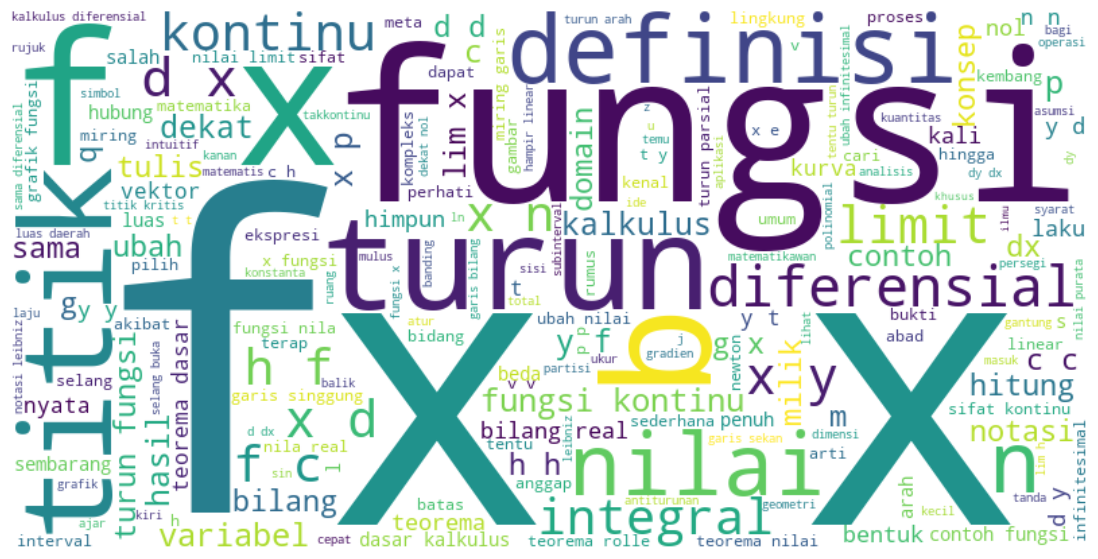

In [68]:
text_for_wc = " ".join(tokens_stemmed)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wc)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

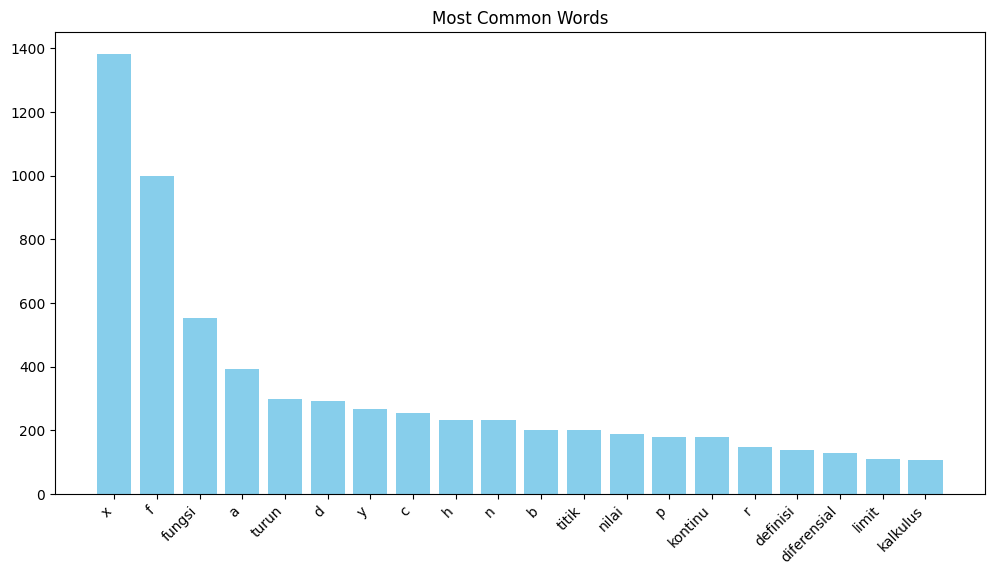

In [66]:
from collections import Counter
freq = Counter(tokens_stemmed)
most_common = freq.most_common(20) 
words, counts = zip(*most_common)
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Words")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
documents = [" ".join(word_tokenize(re.sub(r'\s+', ' ', re.sub(r'\\[a-zA-Z]+', ' ', item['content'].lower())))) for item in dataset]
vectorizer = TfidfVectorizer(stop_words=stopwords.words('indonesian'), max_df=0.8, min_df=1)
X = vectorizer.fit_transform(documents)
num_clusters = 3
km_model = KMeans(n_clusters=num_clusters, random_state=42)
km_model.fit(X)
labels = km_model.labels_
for i, item in enumerate(dataset):
    print(f"Artikel: {item['title']} - Cluster: {labels[i]}")


Artikel: Kalkulus - Cluster: 2
Artikel: Teorema dasar kalkulus - Cluster: 2
Artikel: Limit fungsi - Cluster: 1
Artikel: Fungsi kontinu - Cluster: 0
Artikel: Teorema nilai purata - Cluster: 2
Artikel: Teorema Rolle - Cluster: 2
Artikel: Kalkulus diferensial - Cluster: 1
Artikel: Turunan - Cluster: 1
Artikel: Tabel turunan - Cluster: 1
Artikel: Diferensial (matematika) - Cluster: 1


c:\Users\Adi Karunia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


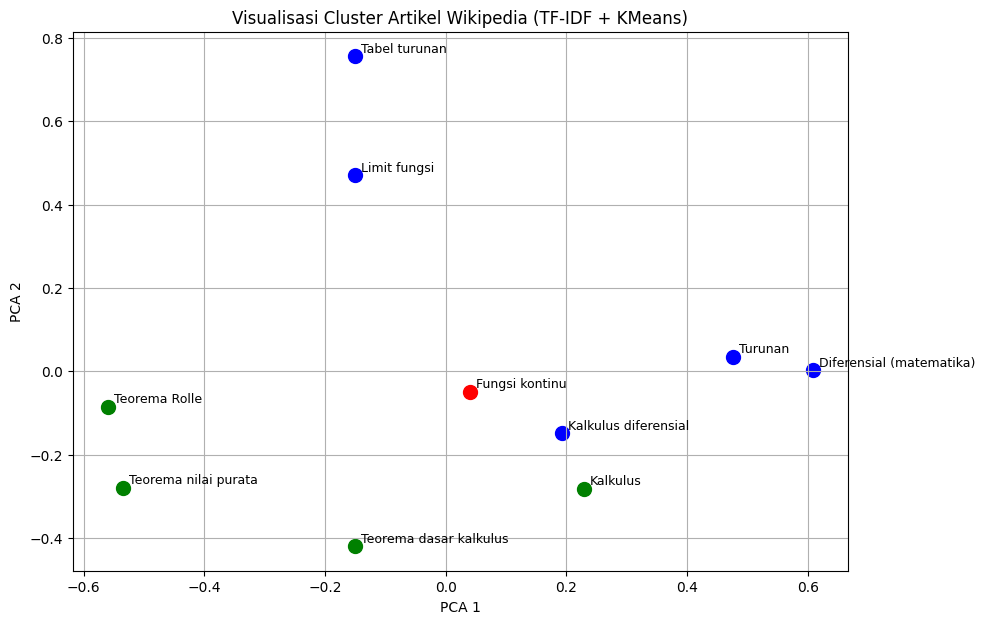

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(10,7))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(len(dataset)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=colors[labels[i] % len(colors)], s=100)
for i, item in enumerate(dataset):
    plt.text(X_pca[i, 0]+0.01, X_pca[i, 1]+0.01, item['title'], fontsize=9)
plt.title("Visualisasi Cluster Artikel Wikipedia (TF-IDF + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0189
